# DSA210 Term Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

In [8]:
DATA = {
    'Date': pd.date_range(start='2025-03-15', periods=40),
    'Total Sleep Time (hr)': [9.05, 8.5, 6.25, 7.58, 9.67, 6.42, 12.0, 4.83, 7.75, 9.5,
                              7.25, 11.83, 9.83, 8.25, 6.67, 7.17, 9.0, 10.0, 7.67, 6.58,
                              7.5, 5.67, 9.58, 6.5, 8.75, 7.17, 7.17, 6.5, 5.33, 6.67,
                              7.0, 11.0, 8.0, 7.17, 7.5, 7.0, 8.67, 7.83, 7.0, 8.67],
    'Human Benchmark Score': [282, 281, 312, 308, 255, 256, 310, 292, 256, 326,
                              332, 309, 289, 310, 346, 279, 278, 323, 343, 292,
                              300, 263, 342, 326, 300, 344, 322, 318, 368, 301,
                              362, 309, 342, 314, 298, 294, 317, 367, 301, 302]
}

I know it is not the most efficient way, however, I put my dataset in here because it is a small amount.

# Data Process

In [13]:
df = pd.DataFrame(DATA)
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                      Date  Total Sleep Time (hr)  Human Benchmark Score
count                   40              40.000000              40.000000
mean   2025-04-03 12:00:00               7.912000             309.225000
min    2025-03-15 00:00:00               4.830000             255.000000
25%    2025-03-24 18:00:00               6.917500             292.000000
50%    2025-04-03 12:00:00               7.540000             309.000000
75%    2025-04-13 06:00:00               8.812500             326.000000
max    2025-04-23 00:00:00              12.000000             368.000000
std                    NaN               1.629325              29.053873


# Histogram

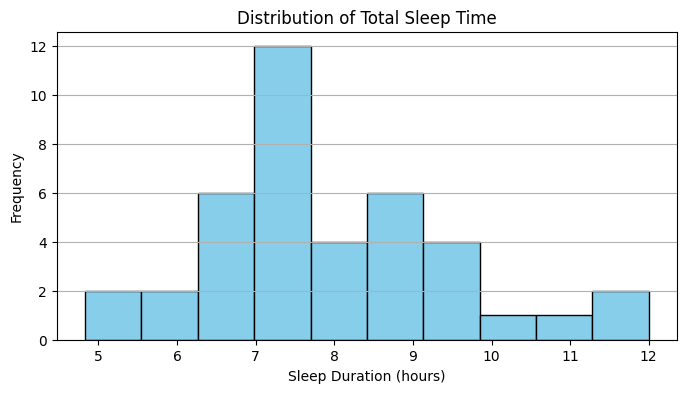

In [15]:
plt.figure(figsize=(8, 4))
plt.hist(df['Total Sleep Time (hr)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sleep Time')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Scatter Plot and Regression Line

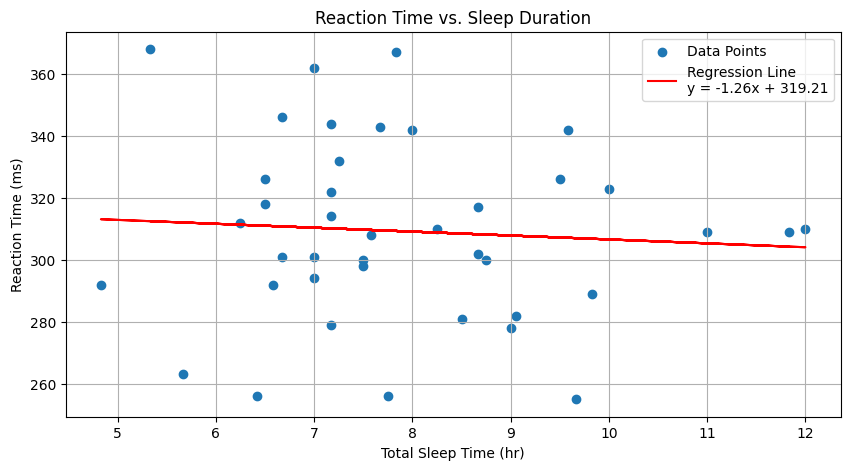

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Total Sleep Time (hr)'], df['Human Benchmark Score'], label="Data Points")
slope, intercept, r_value, p_value, std_err = linregress(df['Total Sleep Time (hr)'], df['Human Benchmark Score'])
plt.plot(df['Total Sleep Time (hr)'], slope * df['Total Sleep Time (hr)'] + intercept, color='red', label=f"Regression Line\ny = {slope:.2f}x + {intercept:.2f}")
plt.title("Reaction Time vs. Sleep Duration")
plt.xlabel("Total Sleep Time (hr)")
plt.ylabel("Reaction Time (ms)")
plt.legend()
plt.grid(True)
plt.show()

The Regression Line helps us to see where the most points are grouped together (which intervals of sleep times and reaction results).

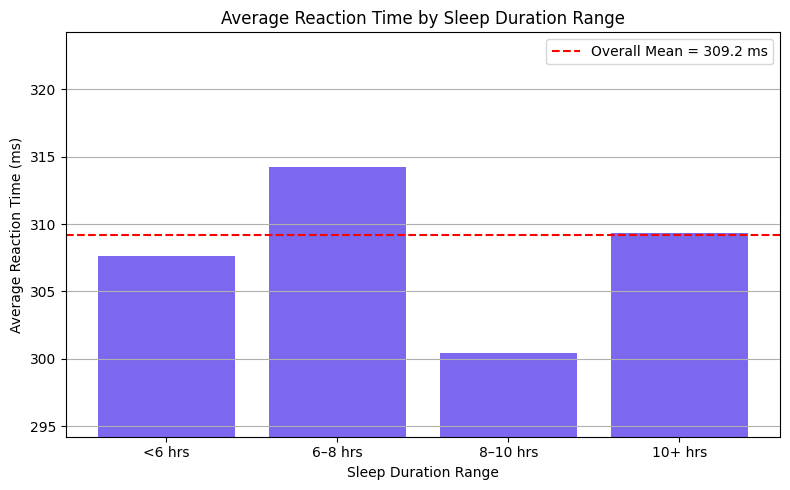

In [27]:
bins = [0, 6, 8, 10, np.inf]
labels = ['<6 hrs', '6–8 hrs', '8–10 hrs', '10+ hrs']
df['Sleep Range'] = pd.cut(df['Total Sleep Time (hr)'], bins=bins, labels=labels)
grouped_stats = df.groupby('Sleep Range', observed=True)['Human Benchmark Score'].mean().reset_index()

mean_score = df['Human Benchmark Score'].mean()
plt.figure(figsize=(8, 5))
plt.bar(grouped_stats['Sleep Range'], grouped_stats['Human Benchmark Score'], color='mediumslateblue')
plt.axhline(mean_score, color='red', linestyle='--', label=f'Overall Mean = {mean_score:.1f} ms')
plt.title('Average Reaction Time by Sleep Duration Range')
plt.xlabel('Sleep Duration Range')
plt.ylabel('Average Reaction Time (ms)')
plt.ylim(mean_score - 15, mean_score + 15)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

These statistics show us I have a better reaction time when I sleep about 8-10 hours daily (optimal interval).

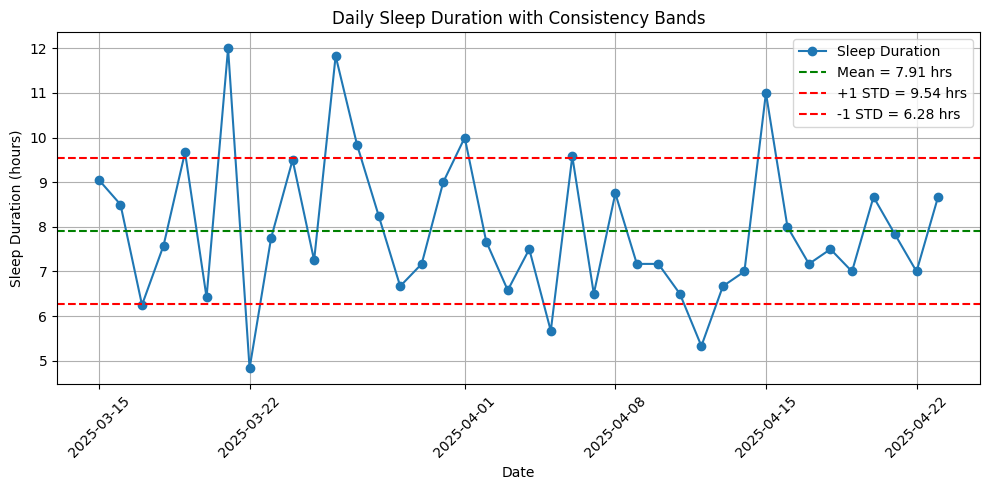

In [21]:
sleep_std = df['Total Sleep Time (hr)'].std()
sleep_mean = df['Total Sleep Time (hr)'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total Sleep Time (hr)'], marker='o', linestyle='-', label='Sleep Duration')
plt.axhline(sleep_mean, color='green', linestyle='--', label=f'Mean = {sleep_mean:.2f} hrs')
plt.axhline(sleep_mean + sleep_std, color='red', linestyle='--', label=f'+1 STD = {sleep_mean + sleep_std:.2f} hrs')
plt.axhline(sleep_mean - sleep_std, color='red', linestyle='--', label=f'-1 STD = {sleep_mean - sleep_std:.2f} hrs')
plt.title('Daily Sleep Duration with Consistency Bands')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

The blue line shows my daily sleep durations across 40 days.
The green dashed line is my average sleep duration.
The red dashed lines represent ±1 standard deviation.

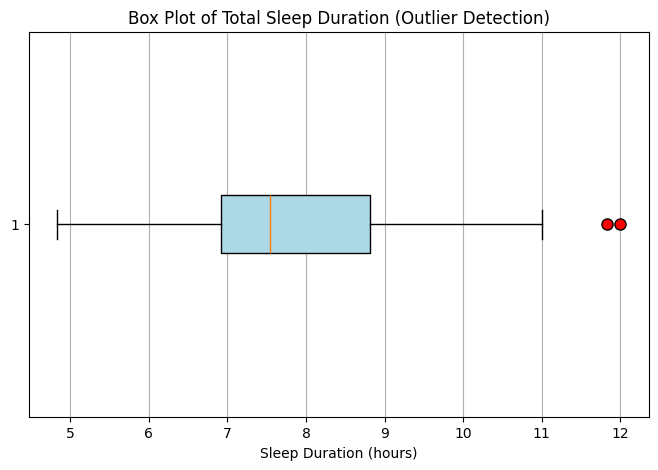

,Date,Total Sleep Time (hr),Human Benchmark Score,Is Outlier
6,2025-03-21,12.00,310,True
11,2025-03-26,11.83,309,True


In [23]:
Q1 = df['Total Sleep Time (hr)'].quantile(0.25)
Q3 = df['Total Sleep Time (hr)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark outliers
df['Is Outlier'] = (df['Total Sleep Time (hr)'] < lower_bound) | (df['Total Sleep Time (hr)'] > upper_bound)

# Visualize with a box plot and outliers highlighted
plt.figure(figsize=(8, 5))
plt.boxplot(df['Total Sleep Time (hr)'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))
plt.title('Box Plot of Total Sleep Duration (Outlier Detection)')
plt.xlabel('Sleep Duration (hours)')
plt.grid(axis='x')
plt.show()

# Display outlier rows
df[df['Is Outlier']]

We detect the outliers in the dataset in order not to interrupt our mean and median (they are edge cases).

Over the course of 40 days, I tracked my sleep duration and reaction time to understand how my sleep habits affect my cognitive performance. Based on the data analysis, a few patterns emerged:

Most consistent performance was observed when I slept between 8 to 10 hours. This group had the lowest average reaction time (~300 ms), suggesting improved cognitive alertness.

Both short (<6 hrs) and excessive (>10 hrs) sleep durations were associated with slightly worse reaction times. This aligns with existing research that suggests both under- and oversleeping can negatively affect brain function.

Despite a moderate standard deviation of 1.63 hours, I had a few clear outliers, especially nights with over 11.5–12 hours of sleep. These did not lead to better reaction time and might reflect recovery sleep after poor sleep quality or disrupted days.

A hypothesis test indicated no statistically significant linear correlation between sleep and reaction time in this dataset (p = 0.664). However, the group-based analysis revealed that sleep range might be a more useful indicator than daily totals.

Takeaways:
Consistency > Quantity: Sleeping regularly within the 8–10 hour range seems more beneficial than occasionally getting long sleep.

I plan to maintain a more consistent sleep routine and avoid extremes (very short or long nights).

This experiment has also made me more aware of how small lifestyle changes might influence cognitive sharpness, especially in the morning.

# Hypothesis Testing

In [22]:
corr, p_val = pearsonr(df['Total Sleep Time (hr)'], df['Human Benchmark Score'])
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_val:.5f}")
if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant relationship).")
else:
    print("Result: Fail to reject the null hypothesis (no significant relationship).")

Pearson Correlation: -0.071
P-value: 0.66428
Result: Fail to reject the null hypothesis (no significant relationship).


We resulted from our p-value (since it is lower than 0.5) that we cannot say sleep duration and timing have significant effect on cognitive performance.

# Data Summary

In [29]:
summary = {
    "Total Days Tracked": len(df),
    "Average Sleep Time (hrs)": round(df['Total Sleep Time (hr)'].mean(), 2),
    "Average Reaction Time (ms)": round(df['Human Benchmark Score'].mean(), 1),
    "Sleep Duration Std Dev (hrs)": round(df['Total Sleep Time (hr)'].std(), 2),
    "Correlation (r)": round(df['Total Sleep Time (hr)'].corr(df['Human Benchmark Score']), 3),
    "P-Value (Correlation Test)": round(p_value, 5),
    "Hypothesis Test Result": "Fail to Reject H₀ (no significant relationship)" if p_value > 0.05 else "Reject H₀ (significant relationship)"
}

# Convert to DataFrame for display
summary_df = pd.DataFrame(list(summary.items()), columns=["Metric", "Value"])

summary_df

,Metric,Value
0,Total Days Tracked,40
1,Average Sleep Time (hrs),7.91
2,Average Reaction Time (ms),309.2
3,Sleep Duration Std Dev (hrs),1.63
4,Correlation (r),-0.071
5,P-Value (Correlation Test),0.66428
6,Hypothesis Test Result,Fail to Reject H₀ (no significant relationship)
